<h1>SimpleRNN Model for Weather Temperature Prediction</h1>

<h3>Objective</h3>
<p>The goal of this assignment is to design, implement, and evaluate a Recurrent Neural Network (RNN) model (using SimpleRNN) to forecast the next day’s temperature based on past weather data.</p>

<h2>Part A: Data Understanding and Preprocessing
</h2>

<h3>1. Load the dataset and explore</h3>

In [98]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [100]:
# Load dataset
df = pd.read_csv("C:/Users/sheji/Desktop/Data science/weather/weatherHistory.csv")  

In [102]:
# Display first 10 rows
print("First 10 rows of dataset:")
df.head(10)

First 10 rows of dataset:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [39]:
# Check fields 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


<h3>2. Data Preprocessing</h3> 

In [21]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [25]:
df.isnull().sum()/len(df) * 100

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

In [41]:
# Fill null value with "Unknown"
df['Precip Type'] = df['Precip Type'].fillna("Unknown")

In [43]:
print(df.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [114]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

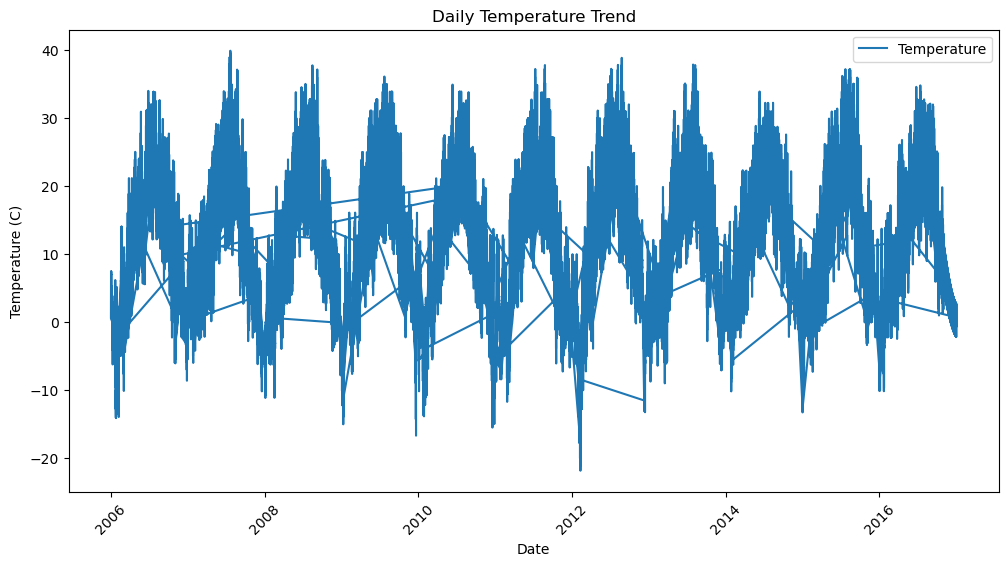

In [118]:
# Plot temperature trend over time
plt.figure(figsize=(12,6))
plt.plot(df['Formatted Date'], df['Temperature (C)'], label='Temperature', color='tab:blue')
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Daily Temperature Trend")
plt.xticks(rotation=45)
plt.legend()
plt.show()

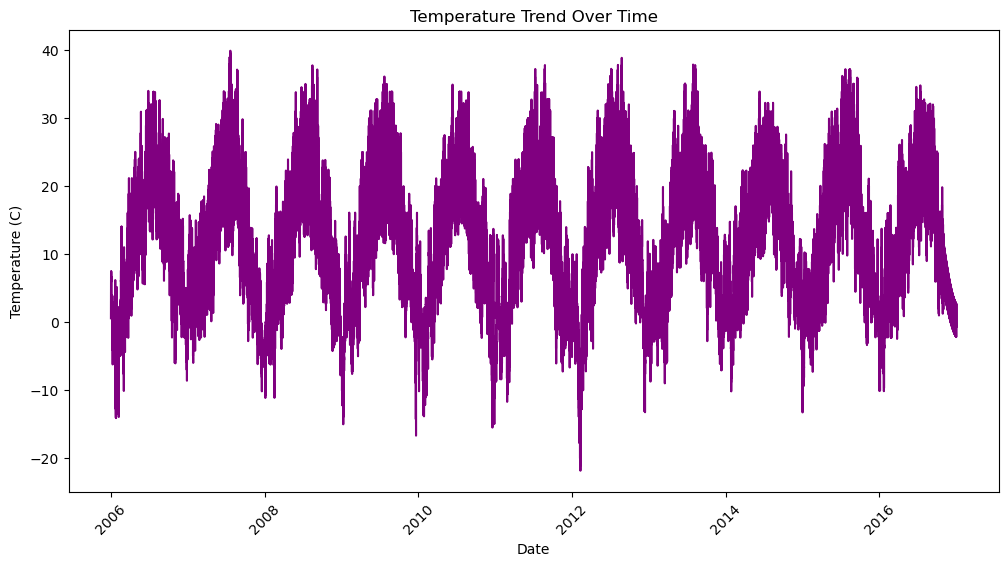

In [123]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Formatted Date", y="Temperature (C)", data=df, color="purple")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Temperature Trend Over Time")
plt.xticks(rotation=45)
plt.show()


<h4>Normalize with MinMaxScaler</h4>

In [124]:
from sklearn.preprocessing import MinMaxScaler
# Select only numerical columns to scale
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)

<h4> Create input Sequences</h4>

In [79]:
def create_sequences(data, target_col_idx, seq_length=7):
    """
    data: np.array (scaled features)
    target_col_idx: index of the target column (Temperature)
    seq_length: number of past days to use
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])          # past seq_length days
        y.append(data[i+seq_length, target_col_idx])  # next day's temperature
    return np.array(X), np.array(y)

<h3>Select Features and Target</h3>

In [127]:
# Convert DataFrame → numpy array
data = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].values
# Temperature is column index 0
target_col_idx = 0
# Create sequences with past 14 days (you can also try 7)
SEQ_LEN = 14
X, y = create_sequences(data, target_col_idx, SEQ_LEN)
print("Shape of X:", X.shape)  # (samples, timesteps, features)
print("Shape of y:", y.shape)

Shape of X: (96439, 14, 3)
Shape of y: (96439,)


<h3>Data Splitting </h3>

In [146]:
# split ratios
train_size = int(0.8 * len(X))   # 80% train
val_size   = int(0.1 * len(X))   # 10% validation
test_size  = len(X) - train_size - val_size  # remaining 10% test
# Split the data
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val     = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test   = X[train_size+val_size:], y[train_size+val_size:]
# Print shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (77151, 14, 3) (77151,)
Validation shape: (9643, 14, 3) (9643,)
Test shape: (9645, 14, 3) (9645,)


<h2>Part B: RNN Model Development
</h2>

<h3>1. Build a SimpleRNN model</h3>

In [ ]:
SEQ_LEN = X_train.shape[1]
num_features = X_train.shape[2]
model = Sequential()
# First RNN layer (return_sequences=True to stack another RNN)
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(SEQ_LEN, num_features)))
# Second RNN layer (return_sequences=False, outputs last timestep)
model.add(SimpleRNN(units=50, return_sequences=False))
# Output layer (1 unit for regression)
model.add(Dense(units=1))
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Model summary
model.summary()

<h3>2. Train the model</h3>

In [166]:
#Stops training if validation loss doesn’t improve after a number of epochs.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=10,  # stop if no improvement for 10 epochs
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=50,          # you can increase to 100
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 9.9192e-04 - mae: 0.0213 - val_loss: 4.8457e-04 - val_mae: 0.0167
Epoch 2/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 6.6814e-04 - mae: 0.0181 - val_loss: 4.1405e-04 - val_mae: 0.0141
Epoch 3/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 6.5275e-04 - mae: 0.0178 - val_loss: 3.8341e-04 - val_mae: 0.0132
Epoch 4/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.9784e-04 - mae: 0.0167 - val_loss: 3.7958e-04 - val_mae: 0.0135
Epoch 5/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.9478e-04 - mae: 0.0166 - val_loss: 4.1961e-04 - val_mae: 0.0151
Epoch 6/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.6829e-04 - mae: 0.0161 - val_loss: 3.5709e-04 - val_mae: 0.0125
Epoch 7/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.7156e-04 - mae: 0.0161 - val_loss: 3.7744e-04 - val_mae: 0.0134
Epoch 8/50
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.5781e-04 - mae: 0.0157 - val_loss: 3.592

<h3>3. Plot Training vs Validation Loss</h3>

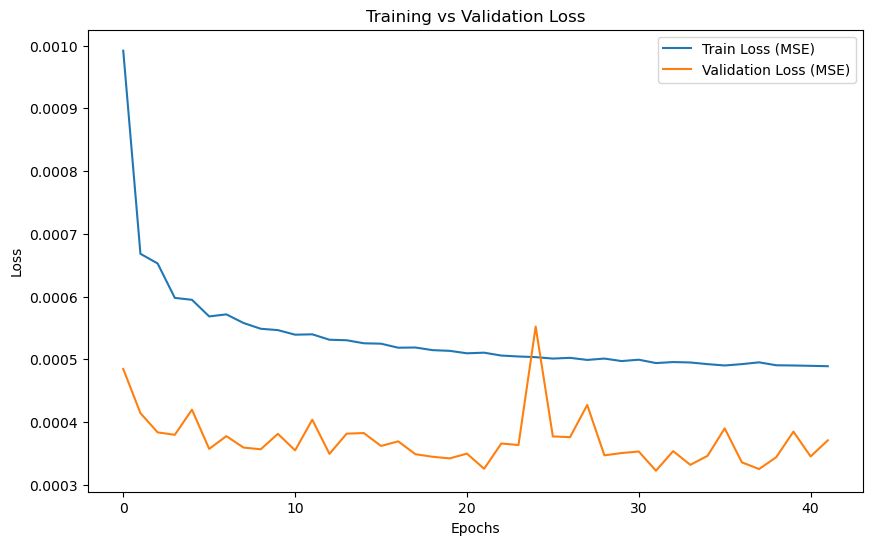

In [169]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

<h2>Part C: Model Evaluation & Forecasting
</h2>

In [181]:
# Make Predictions on Test Set
# Predict on X_test
y_pred = model.predict(X_test) 

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


<h3>Calculate Evaluation Metrics</h3>

In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)
# Create a dummy array for inverse transform if you scaled multiple features
y_test_full = np.zeros((len(y_test), scaler.n_features_in_))
y_pred_full = np.zeros((len(y_pred), scaler.n_features_in_))
# Put values only in the temperature column (index 0)
y_test_full[:, 0] = y_test
y_pred_full[:, 0] = y_pred.reshape(-1)
# Inverse transform and extract only temperature column
y_test_unscaled = scaler.inverse_transform(y_test_full)[:, 0]
y_pred_unscaled = scaler.inverse_transform(y_pred_full)[:, 0]
# Compute metrics
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2  = r2_score(y_test_unscaled, y_pred_unscaled)
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test R² Score: {r2:.3f}")

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Test RMSE: 1.038
Test MAE: 0.672
Test R² Score: 0.987


<h3>Plot Predicted vs Actual Temperatures</h3>

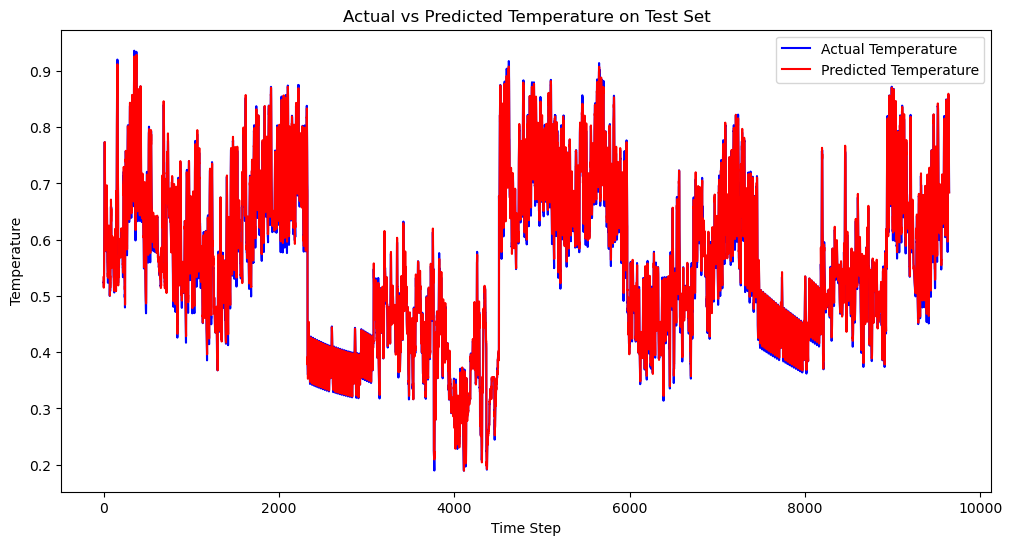

In [188]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Temperature', color='blue')
plt.plot(y_pred, label='Predicted Temperature', color='red')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature on Test Set')
plt.legend()
plt.show()

<h3>Forecast the Next 7 Days</h3>

In [202]:
n_forecast = 7
forecast_seq = X_test[-1].copy()  # last sequence from test set
future_preds = []
for _ in range(n_forecast):
    # Predict next day
    pred = model.predict(forecast_seq[np.newaxis, :, :])[0,0]
    future_preds.append(pred) 
    # Update the sequence: remove first timestep and append predicted value
    new_row = forecast_seq[-1].copy()  # copy last day's features
    new_row[0] = pred                  # replace temperature with predicted value
    forecast_seq = np.vstack([forecast_seq[1:], new_row])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<h3>Visualize Forecast vs Recent Historical Data</h3>

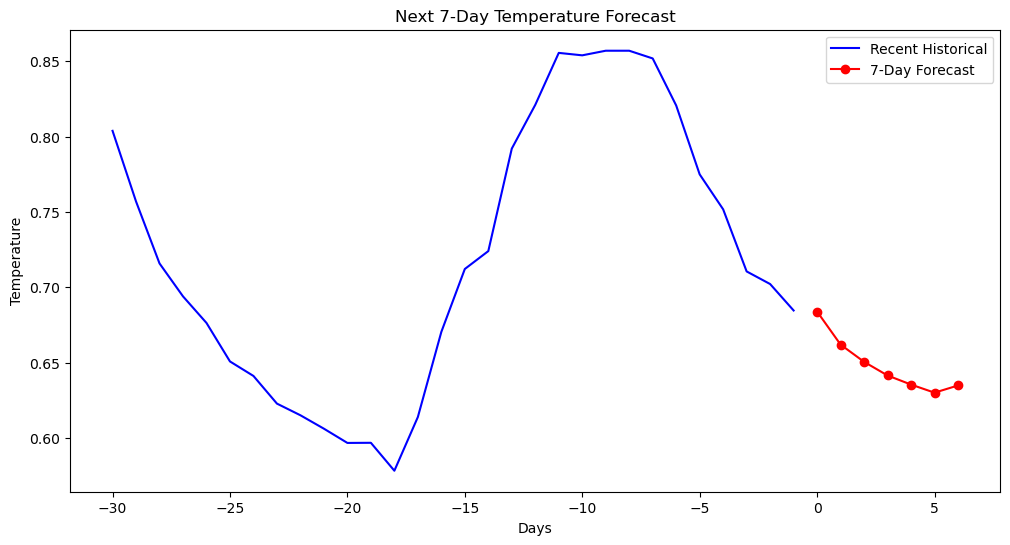

In [204]:
plt.figure(figsize=(12,6))

# Plot recent historical temperatures
plt.plot(range(-30, 0), y_test[-30:], label='Recent Historical', color='blue')

# Plot 7-day forecast
plt.plot(range(0, n_forecast), future_preds, label='7-Day Forecast', color='red', marker='o')

plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Next 7-Day Temperature Forecast')
plt.legend()
plt.show()
